In [1]:
import sys
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.metropol import Metropol
from classes.optimizers.random_struct_search import Random_Searcher
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

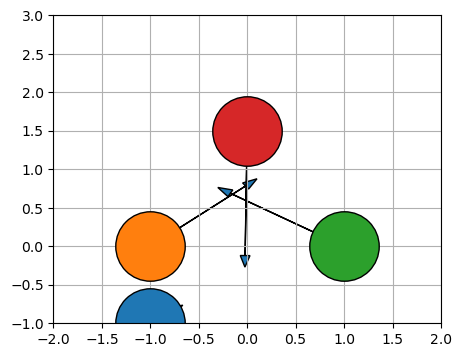

In [2]:
atomlist = []
positions = [np.array([-1.0,-1.0]), np.array([-1.0,0.0]), np.array([1.0,0.0]), np.array([0.0, 1.5])]
colors = ["C0", "C1", "C2", "C3"]
is_frozen = [False] + [True for i in range(3)]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-1.0,3.0])
for position, color, frozen in zip(positions, colors, is_frozen):
    atom = Atom(position=position, color=color, frozen=frozen)
    atomlist.append(atom)
ax.grid()
atom_col = Atom_Collection(atomlist=atomlist)
atom_col.calculator = LennardJones()
forces = atom_col.get_forces()
atom_col.plot(ax=ax)
for atom, force in zip(atom_col, forces):
    ax.arrow(atom.pos[0], atom.pos[1], force[0], force[1], head_width=0.1)
E_lim = 5.0
xs = np.linspace(-2.0, 2.0, 200)
ys = np.linspace(-2.0, 2.0, 200)
energies = np.zeros(shape=(len(ys), len(xs)))

In [3]:
for i in range(15000):
    step=1e-4*atom_col.get_forces()
    atom_col.move_atoms(new_pos=step)

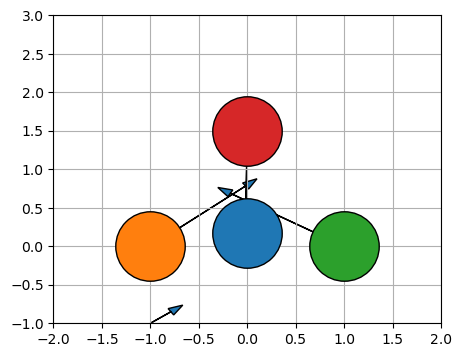

In [4]:
atom_col.plot(ax=ax)
fig

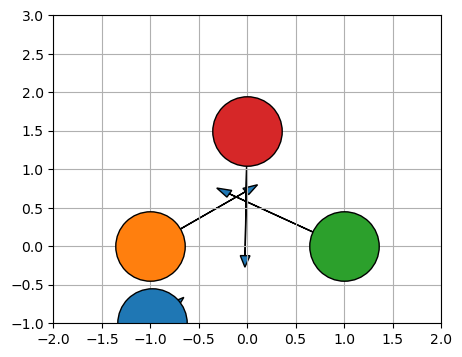

In [19]:
atomlist = []
positions = [np.array([-0.98,-1.0]), np.array([-1.0,0.0]), np.array([1.0,0.0]), np.array([0.0, 1.5])]
colors = ["C0", "C1", "C2", "C3"]
is_frozen = [False] + [True for i in range(3)]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_xlim([-2.0,2.0])
ax.set_ylim([-1.0,3.0])
for position, color, frozen in zip(positions, colors, is_frozen):
    atom = Atom(position=position, color=color, frozen=frozen)
    atomlist.append(atom)
ax.grid()
atom_col = Atom_Collection(atomlist=atomlist)
atom_col.calculator = LennardJones()
forces = atom_col.get_forces()
atom_col.plot(ax=ax)
for atom, force in zip(atom_col, forces):
    ax.arrow(atom.pos[0], atom.pos[1], force[0], force[1], head_width=0.1)
E_lim = 5.0
xs = np.linspace(-2.0, 2.0, 200)
ys = np.linspace(-2.0, 2.0, 200)
energies = np.zeros(shape=(len(ys), len(xs)))

In [20]:
optimizer = Random_Searcher(atom_col=atom_col, step_size=0.1)
optimizer.line_search(atom_col=atom_col, N_max=4000)

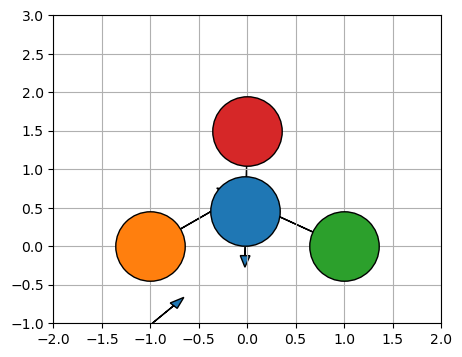

In [21]:
atom_col.plot(ax=ax)
fig

In [22]:
print(atom_col.get_potential_energy())

-13.590930151391419


In [23]:
print(atom_col.get_forces())

[[  0.62010901  -1.05208032]
 [ 12.78723037   6.28850725]
 [-13.22292109   6.27517058]
 [ -0.18441829 -11.51159751]]
